In [1]:
#PROBLEM 1 CODE (this was the portion I kept to do problem 2)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file = "Appendix B (shares).xls" #storing mt file path
  
FAH_sheets = {  #using a dictionary to map my time period labels with my FAH sheet names
    "1994-1998": "94-98 FAH",
    "2003-2004": "03-04 FAH",
    "2005-2006": "05-06 FAH",
    "2007-2008": "07-08 FAH"
}

fruits = [ #fruit types I'm considering
    "apples as fruit", "bananas", "berries", "grapes", "melons",
    "oranges, total", "other citrus fruit", "stone fruit", "tropical fruit"
]

dairy = ["fluid milk, total", "butter", "cheese", "yogurt", "dairy, other"] # dairy types

In [4]:
def loaded_data(sheet_name, start_column=7, start_row=77):  # using a helper function for getting mean pounds consumption data for men and women
    df = pd.read_excel(file, sheet_name= sheet_name, header = None, engine="xlrd")
    data_cleaned = df.iloc[start_row:, [0, start_column, 10]] #reading from row 77, in columns 0, 7, and 10
    data_cleaned.columns = ["Category", "Men", "Women"] #renaming my columns
    data_cleaned["Category_clean"] = data_cleaned["Category"].astype(str).str.strip().str.lower() 
    return data_cleaned

In [5]:
def type_filter(data_cleaned, keywords): #getting the rows that only match my types
    mask = data_cleaned["Category_clean"].apply(
        lambda x: any(kw in x for kw in keywords)
    )
    filtered = data_cleaned.loc[mask, ["Category", "Category_clean", "Men", "Women"]]
    filtered = filtered.set_index("Category")[["Men", "Women"]].groupby(level=0).first()
    return filtered

m_fruit, w_fruit = {}, {} # empty dictionaries for the results for fruits for women and men
m_dairy, w_dairy = {}, {} # again empty dictionaries but now for the dairy results

In [6]:
for period, sheet in FAH_sheets.items(): # for m time periods in each sheet
    data = loaded_data(sheet, start_column=7) 
    fruits_df = type_filter(data, fruits) # filter for the fruit rows
    dairy_df = type_filter(data, dairy)  #filter for the dairy
    m_fruit[period] = fruits_df["Men"] # storing my values for fruit for men
    w_fruit[period] = fruits_df["Women"]
    m_dairy[period] = dairy_df["Men"]   #storing my results for dairy for men
    w_dairy[period] = dairy_df["Women"]
m_fruit_df = pd.DataFrame(m_fruit)
w_fruit_df = pd.DataFrame(w_fruit)
m_dairy_df = pd.DataFrame(m_dairy)
w_dairy_df = pd.DataFrame(w_dairy)

In [7]:
# PROBLEEM 2 CODE (all my code for problem 2)

In [9]:
def percent_inc_dec(df): #making a helper function to help me compute the percent change from 1994-1998 to 2007-2008 for each product
    return ((df["2007-2008"] - df["1994-1998"]) / df["1994-1998"]) * 100
m_fruit_percent = percent_inc_dec(m_fruit_df) #applying my helper on my dataframes
w_fruit_percent = percent_inc_dec(w_fruit_df)
m_dairy_percent = percent_inc_dec(m_dairy_df)
w_dairy_percent = percent_inc_dec(w_dairy_df)

In [13]:
def percent_change(fruit_percent, dairy_percent): #making one dataframe with fruit and dairy
    df = pd.concat([fruit_percent, dairy_percent])
    df = df.reset_index()
    df.columns = ["Product", "PercentChange"]
    df["Group"] = df["Product"].apply( # sorting from decreasing to increasing
        lambda x: "Fruit" if any(f in x.lower() for f in [
            "apple", "banana", "berry", "grape", "melon", "orange", "citrus", "stone", "tropical"
        ]) else "Dairy"
    )
    return df.sort_values(by=["Group", "PercentChange"])

m_total_change = percent_change(m_fruit_percent, m_dairy_percent) # final dataframe for men
w_total_change = percent_change(w_fruit_percent, w_dairy_percent) #final df for women

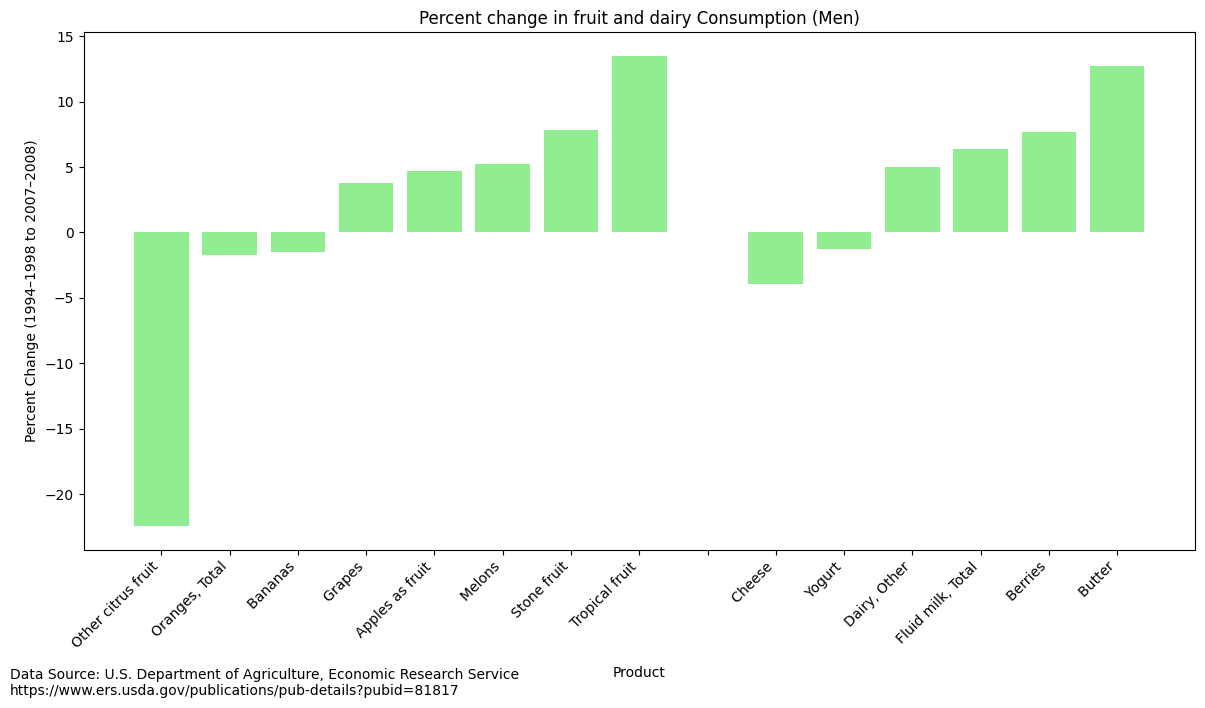

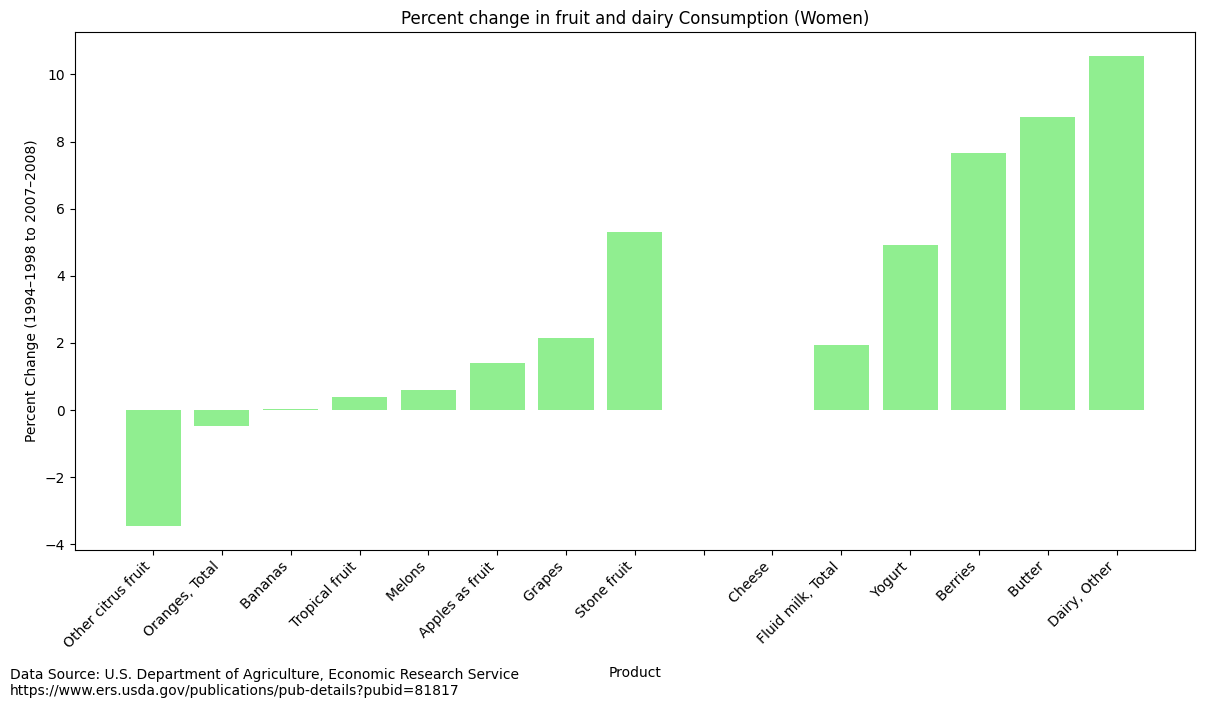

In [20]:
def plot_percent_change(df, title): # Making my bar chart
    fig, axis = plt.subplots(figsize=(12, 7))
    fruit_df = df[df["Group"] == "Fruit"] 
    dairy_df = df[df["Group"] == "Dairy"]
    spacer = pd.DataFrame([["", 0, ""]], columns=df.columns)  # seperating the fruits from the dairy
    combined = pd.concat([fruit_df, spacer, dairy_df])
    axis.bar(combined["Product"], combined["PercentChange"], color="lightgreen")
    axis.set_title(title)
    axis.set_ylabel("Percent Change (1994–1998 to 2007–2008)")
    axis.set_xlabel("Product")
    plt.xticks(rotation=45, ha="right") #giving my x-axis labels a 45 degree angle
    plt.tight_layout()
    plt.figtext( # giving the source of my data for good design principles
        0, 0,
        "Data Source: U.S. Department of Agriculture, Economic Research Service\nhttps://www.ers.usda.gov/publications/pub-details?pubid=81817",
        fontsize=10
    )
    plt.show()

plot_percent_change(men_changes, "Percent change in fruit and dairy Consumption (Men)")
plot_percent_change(women_changes, "Percent change in fruit and dairy Consumption (Women)")